<a href="https://colab.research.google.com/github/RodrigoGuedesDP/Programacion_101/blob/main/IA_Fundamentals/2_hill_climbing_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hill climbing search

![](https://drive.google.com/uc?export=view&id=1IlgFVvt98JrqeC7A1eracheX7oUHBx0E)

In [ ]:
import numpy as np

TSP = [
    [0,   200,     600,       100 ],
    [200,  0,      300,       100 ],
    [600,  300,    0,         400 ],
    [100,  100,    400,       0]
]


# step 1  # solution aleatoria
current_solution = np.array([0, 1, 2, 3])
np.random.shuffle(current_solution)

print(current_solution)


[3 1 2 0]
1000


In [ ]:
def fitness(sol): # depende del problema
  distance = 0
  for i in range(len(sol)-1):
    distance += TSP[sol[i]][sol[i+1]]
  return distance

print(fitness(current_solution))

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

print(current_solution)
print(get_neighbors(current_solution))

1000
[0 2 1 3]
[array([2, 0, 1, 3]), array([1, 2, 0, 3]), array([3, 2, 1, 0]), array([0, 1, 2, 3]), array([0, 3, 1, 2]), array([0, 2, 3, 1])]


In [ ]:
def hill_climbing(sol):
  iter = 1
  while True:

    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    print("iteration:", iter)
    print(sol, "fitness:", fitness(sol))
    print(neighbors)
    print(best_neighbor, "fitness:", fitness(best_neighbor), "\n")

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol

    iter = iter + 1

print(hill_climbing(current_solution))

iteration: 1
[0 2 1 3] fitness: 1000
[array([2, 0, 1, 3]), array([1, 2, 0, 3]), array([3, 2, 1, 0]), array([0, 1, 2, 3]), array([0, 3, 1, 2]), array([0, 2, 3, 1])]
[0 3 1 2] fitness: 500 

iteration: 2
[0 3 1 2] fitness: 500
[array([3, 0, 1, 2]), array([1, 3, 0, 2]), array([2, 3, 1, 0]), array([0, 1, 3, 2]), array([0, 2, 1, 3]), array([0, 3, 2, 1])]
[3 0 1 2] fitness: 600 

[0 3 1 2]


# Plotting


Ejemplo de como visualizar los nodos

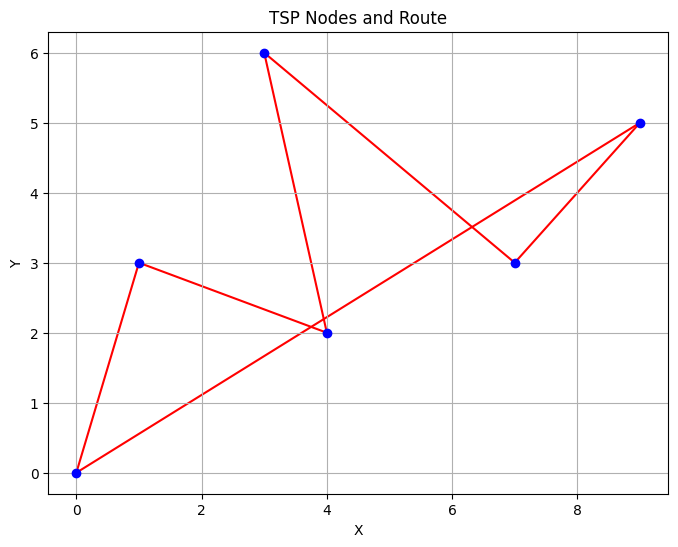

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 5
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))
print(positions)
print(distances)

[[0.38570328 0.09716015]
 [0.73734793 0.11008381]
 [0.68785278 0.67963156]
 [0.81294164 0.90623849]
 [0.34272668 0.08201296]]
[[0.         0.35188205 0.65617625 0.91495376 0.04556781]
 [0.35188205 0.         0.57169433 0.79973538 0.39561837]
 [0.65617625 0.57169433 0.         0.25883957 0.69011594]
 [0.91495376 0.79973538 0.25883957 0.         0.94892034]
 [0.04556781 0.39561837 0.69011594 0.94892034 0.        ]]


Ejemplo de hill climbing con visualización de los nodos

[[0.33563566 0.28109791]
 [0.17921201 0.61360937]
 [0.68698861 0.03618586]
 [0.26016107 0.29801596]
 [0.10704115 0.69547219]
 [0.00923904 0.16799206]
 [0.06616758 0.671102  ]
 [0.05294982 0.56219432]
 [0.30842915 0.39259371]
 [0.95965484 0.66969658]
 [0.24006618 0.21321825]
 [0.36032175 0.27066113]
 [0.71188462 0.76018111]
 [0.27964983 0.62995556]
 [0.8418424  0.14404537]
 [0.87726698 0.13317654]
 [0.7509919  0.4602823 ]
 [0.22761309 0.77289895]
 [0.8746498  0.97411695]
 [0.9214953  0.56730741]
 [0.7244857  0.14181083]
 [0.14079752 0.98275407]
 [0.41202986 0.39174498]
 [0.21534994 0.38220526]
 [0.98228313 0.24117822]
 [0.20593461 0.87495594]
 [0.56679393 0.76434291]
 [0.42650717 0.74266221]
 [0.71683961 0.91668393]
 [0.18139094 0.40059141]
 [0.02864312 0.65869795]
 [0.20322527 0.08696367]
 [0.57058458 0.9485953 ]
 [0.2822309  0.54764411]
 [0.23036632 0.18202818]
 [0.10502117 0.45276795]
 [0.92123475 0.31410019]
 [0.65600862 0.82690706]
 [0.04471694 0.60275161]
 [0.84080725 0.82078917]


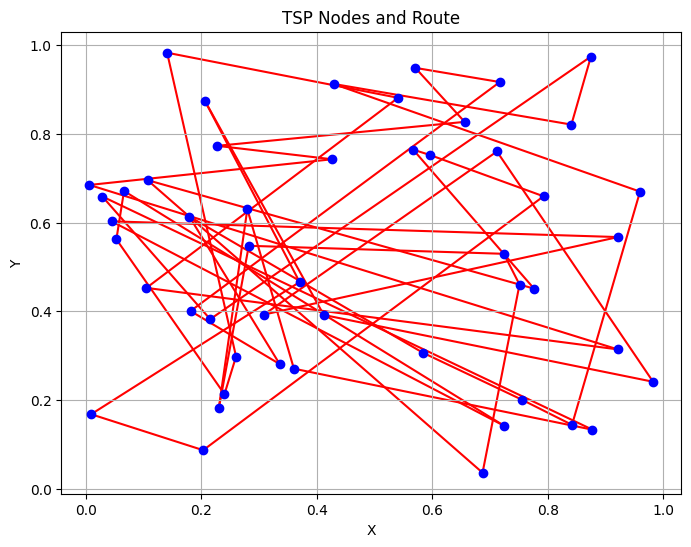

iteration: 1
[25 22 24 12  8 19 38 20  6  7 10  3 21 48 35 36 44 27 17 37 32 28 29  0
  1 47 41 14  9 45 39 18 23 30 15 11 13 34 33 40 16  2  4 46 26 42 43 31
  5 49] fitness: 23.331476837688907
[25 22 24 12  8 19 36 20  6  7 10  3 21 48 35 38 44 27 17 37 32 28 29  0
  1 47 41 14  9 45 39 18 23 30 15 11 13 34 33 40 16  2  4 46 26 42 43 31
  5 49] fitness: 20.58454098310595 

iteration: 2
[25 22 24 12  8 19 36 20  6  7 10  3 21 48 35 38 44 27 17 37 32 28 29  0
  1 47 41 14  9 45 39 18 23 30 15 11 13 34 33 40 16  2  4 46 26 42 43 31
  5 49] fitness: 20.58454098310595
[25 22 24 12  8 19 36 20  6  7 10  3 21 48 35 38 44 27 17 37 32 28 29  0
  1 47 41 14  9 45 39 18 23 30  4 11 13 34 33 40 16  2 15 46 26 42 43 31
  5 49] fitness: 18.589449287240026 

iteration: 3
[25 22 24 12  8 19 36 20  6  7 10  3 21 48 35 38 44 27 17 37 32 28 29  0
  1 47 41 14  9 45 39 18 23 30  4 11 13 34 33 40 16  2 15 46 26 42 43 31
  5 49] fitness: 18.589449287240026
[25 22 24 12  8 19 36 20  6  7 10  3 21 48 35 38 

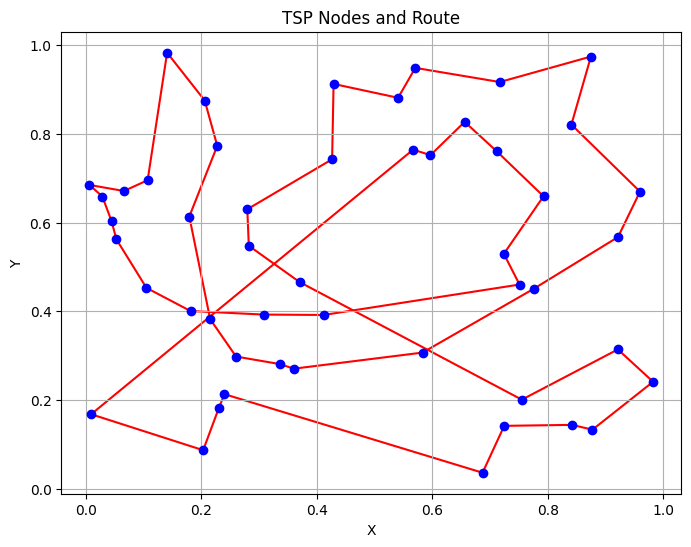

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 50
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))
print(positions)
print(distances)


# step 1  # solution aleatoria
current_solution = np.array(list(range(N)))
np.random.shuffle(current_solution)


plot_tsp(positions, current_solution)

def fitness(sol): # depende del problema
  distance = 0
  for i in range(len(sol)-1):
    distance += distances[sol[i]][sol[i+1]]
  return distance

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  iter = 1
  while True:

    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    print("iteration:", iter)
    print(sol, "fitness:", fitness(sol))
    print(best_neighbor, "fitness:", fitness(best_neighbor), "\n")

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol

    iter += 1

solution = hill_climbing(current_solution)
plot_tsp(positions, solution)